In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from itertools import combinations

plt.style.use('seaborn-v0_8')
sns.set_palette("Set1")

In [3]:
# Загружаем датасет прямо из интернета
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

In [4]:
print("===ОСНОВНАЯ СТАТИСТИКА ПО ДАТАСЕТУ===")
print(f"Размерность датасета: {df.shape}")
print(f"Количество признаков: {df.shape[1]}")
print()

print("Количество объектов в каждом классе:")
print(df['species'].value_counts())
print(f"Количество целевых классов: {df['species'].nunique()}")
print()

# Процент объектов (строк) с хотя бы одним пропущенным значением
rows_with_missing = df.isnull().any(axis=1).sum()
total_rows = df.shape[0]
missing_percent = (rows_with_missing / total_rows) * 100
print(f"Процент объектов с неопределенными признаками: {missing_percent:.2f}%")
print(f"Количество строк с пропущенными значениями: {rows_with_missing} из {total_rows}")
print()

print("Количество пропущенных значений по каждому признаку:")
print(df.isnull().sum())
print()

print("Основные статистические характеристики:")
print(df.describe())
print()

print("Типы данных признаков:")
print(df.dtypes)
print()

===ОСНОВНАЯ СТАТИСТИКА ПО ДАТАСЕТУ===
Размерность датасета: (344, 7)
Количество признаков: 7

Количество объектов в каждом классе:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
Количество целевых классов: 3

Процент объектов с неопределенными признаками: 3.20%
Количество строк с пропущенными значениями: 11 из 344

Количество пропущенных значений по каждому признаку:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Основные статистические характеристики:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000    

In [5]:
# Выбираем три класса и четыре количественных признака
selected_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
selected_species = ['Adelie', 'Chinstrap', 'Gentoo']  # выбираем три класса

print("=== ФОРМИРОВАНИЕ ОТФИЛЬТРОВАННОГО ДАТАСЕТА ===")
print(f"Выбранные количественные признаки: {selected_features}")
print(f"Выбранные классы: {selected_species}")
print()

df_filtered = df[df['species'].isin(selected_species)].copy()
df_filtered = df_filtered[['species'] + selected_features].dropna()

print("Статистика после фильтрации:")
print(f"Размерность отфильтрованного датасета: {df_filtered.shape}")
print(f"Количество признаков: {df_filtered.shape[1]}")
print()

print("Количество объектов в каждом классе после фильтрации:")
print(df_filtered['species'].value_counts())
print()

print("Пропущенные значения в выбранных признаках после фильтрации:")
print(df_filtered[selected_features].isnull().sum())
print()

print("Первые 5 строк отфильтрованного датасета:")
print(df_filtered.head())

=== ФОРМИРОВАНИЕ ОТФИЛЬТРОВАННОГО ДАТАСЕТА ===
Выбранные количественные признаки: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Выбранные классы: ['Adelie', 'Chinstrap', 'Gentoo']

Статистика после фильтрации:
Размерность отфильтрованного датасета: (342, 5)
Количество признаков: 5

Количество объектов в каждом классе после фильтрации:
species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

Пропущенные значения в выбранных признаках после фильтрации:
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
dtype: int64

Первые 5 строк отфильтрованного датасета:
  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0  Adelie            39.1           18.7              181.0       3750.0
1  Adelie            39.5           17.4              186.0       3800.0
2  Adelie            40.3           18.0              195.0       3250.0
4  Adelie            36.7           19.3          

# 3 ПУНКТ

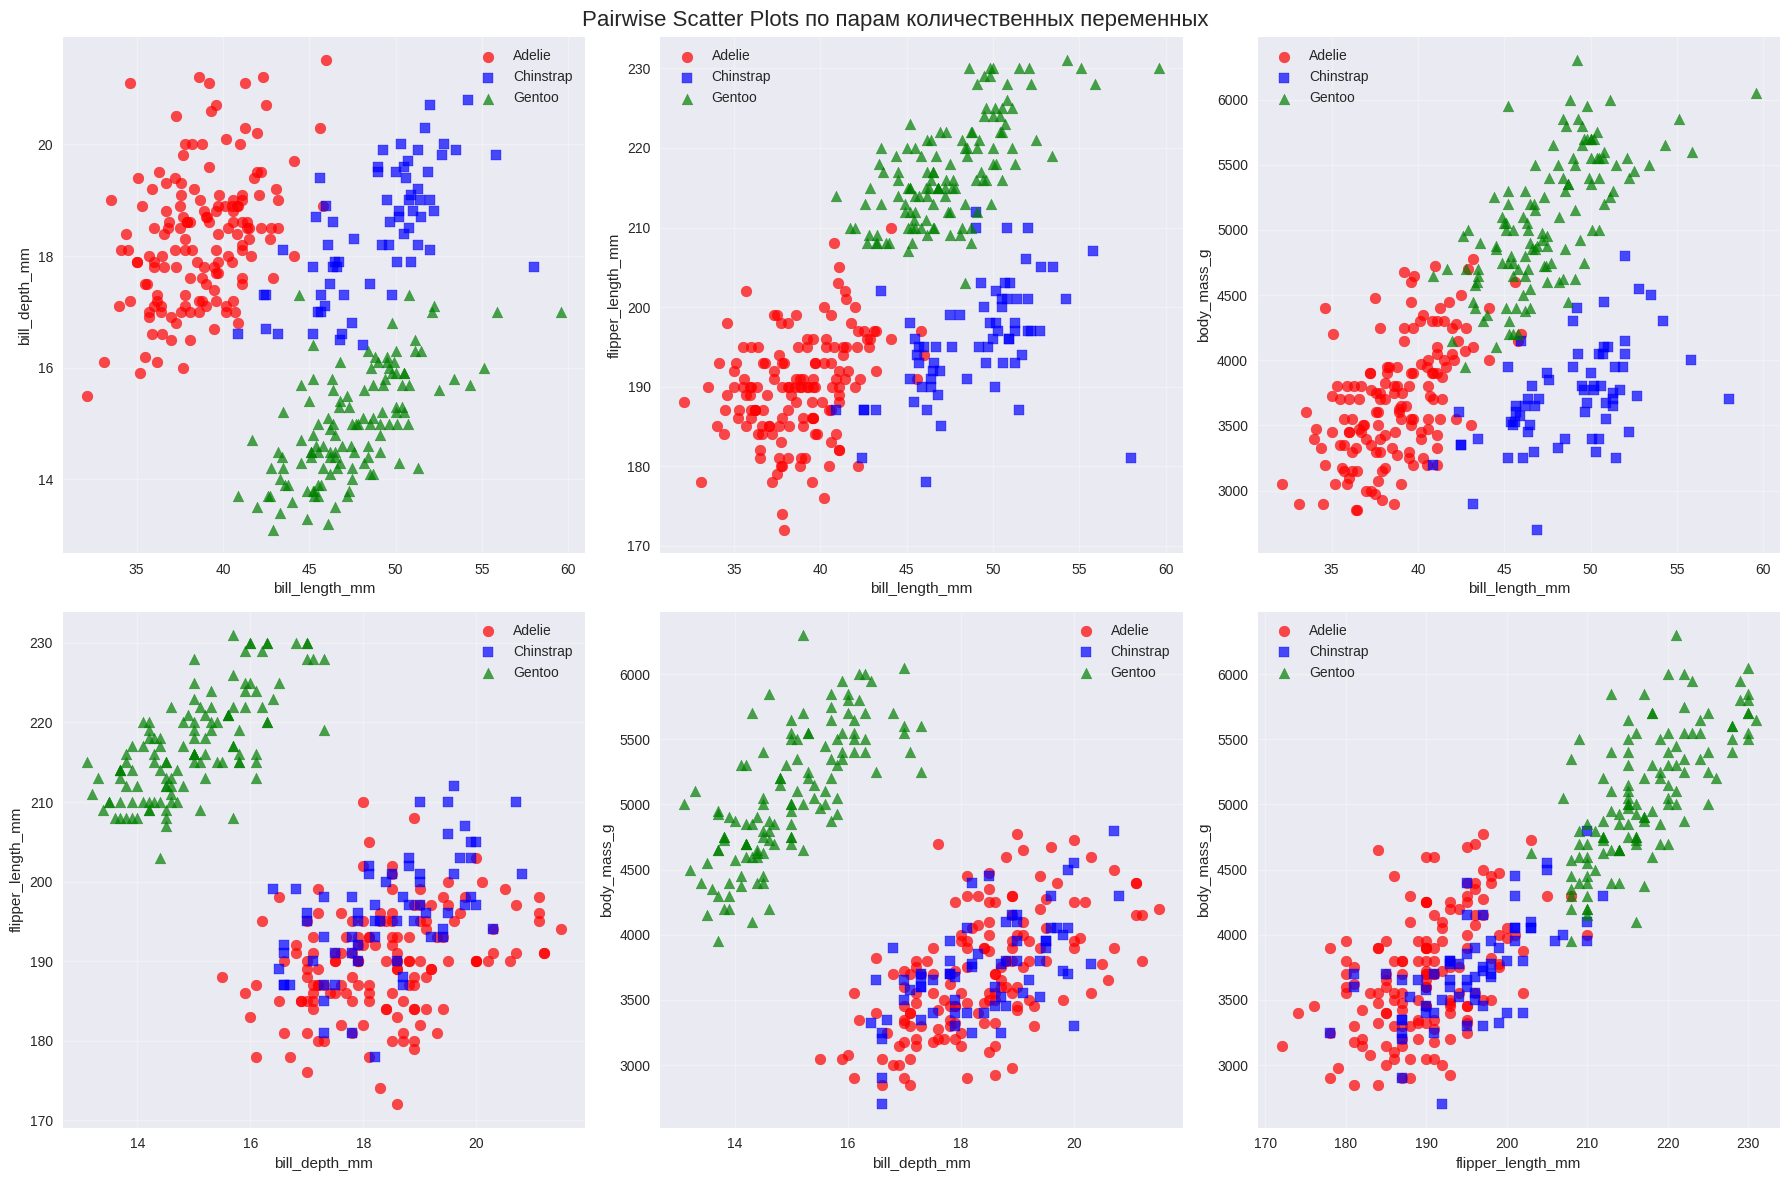

In [6]:
feature_pairs = list(combinations(selected_features, 2))

species_colors = {'Adelie': 'red', 'Chinstrap': 'blue', 'Gentoo': 'green'}
species_markers = {'Adelie': 'o', 'Chinstrap': 's', 'Gentoo': '^'}

fig, axes = plt.subplots(2,3, figsize=(18,12))
fig.suptitle('Pairwise Scatter Plots по парам количественных переменных', fontsize=16)

axes_flat = axes.flatten()

for idx, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes_flat[idx]
    
    # Рисуем точки для каждого класса
    for species in selected_species:
        species_data = df_filtered[df_filtered['species'] == species]
        ax.scatter(species_data[x_feature], species_data[y_feature],
                  c=species_colors[species], marker=species_markers[species],
                  label=species, alpha=0.7, s=60)
    
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

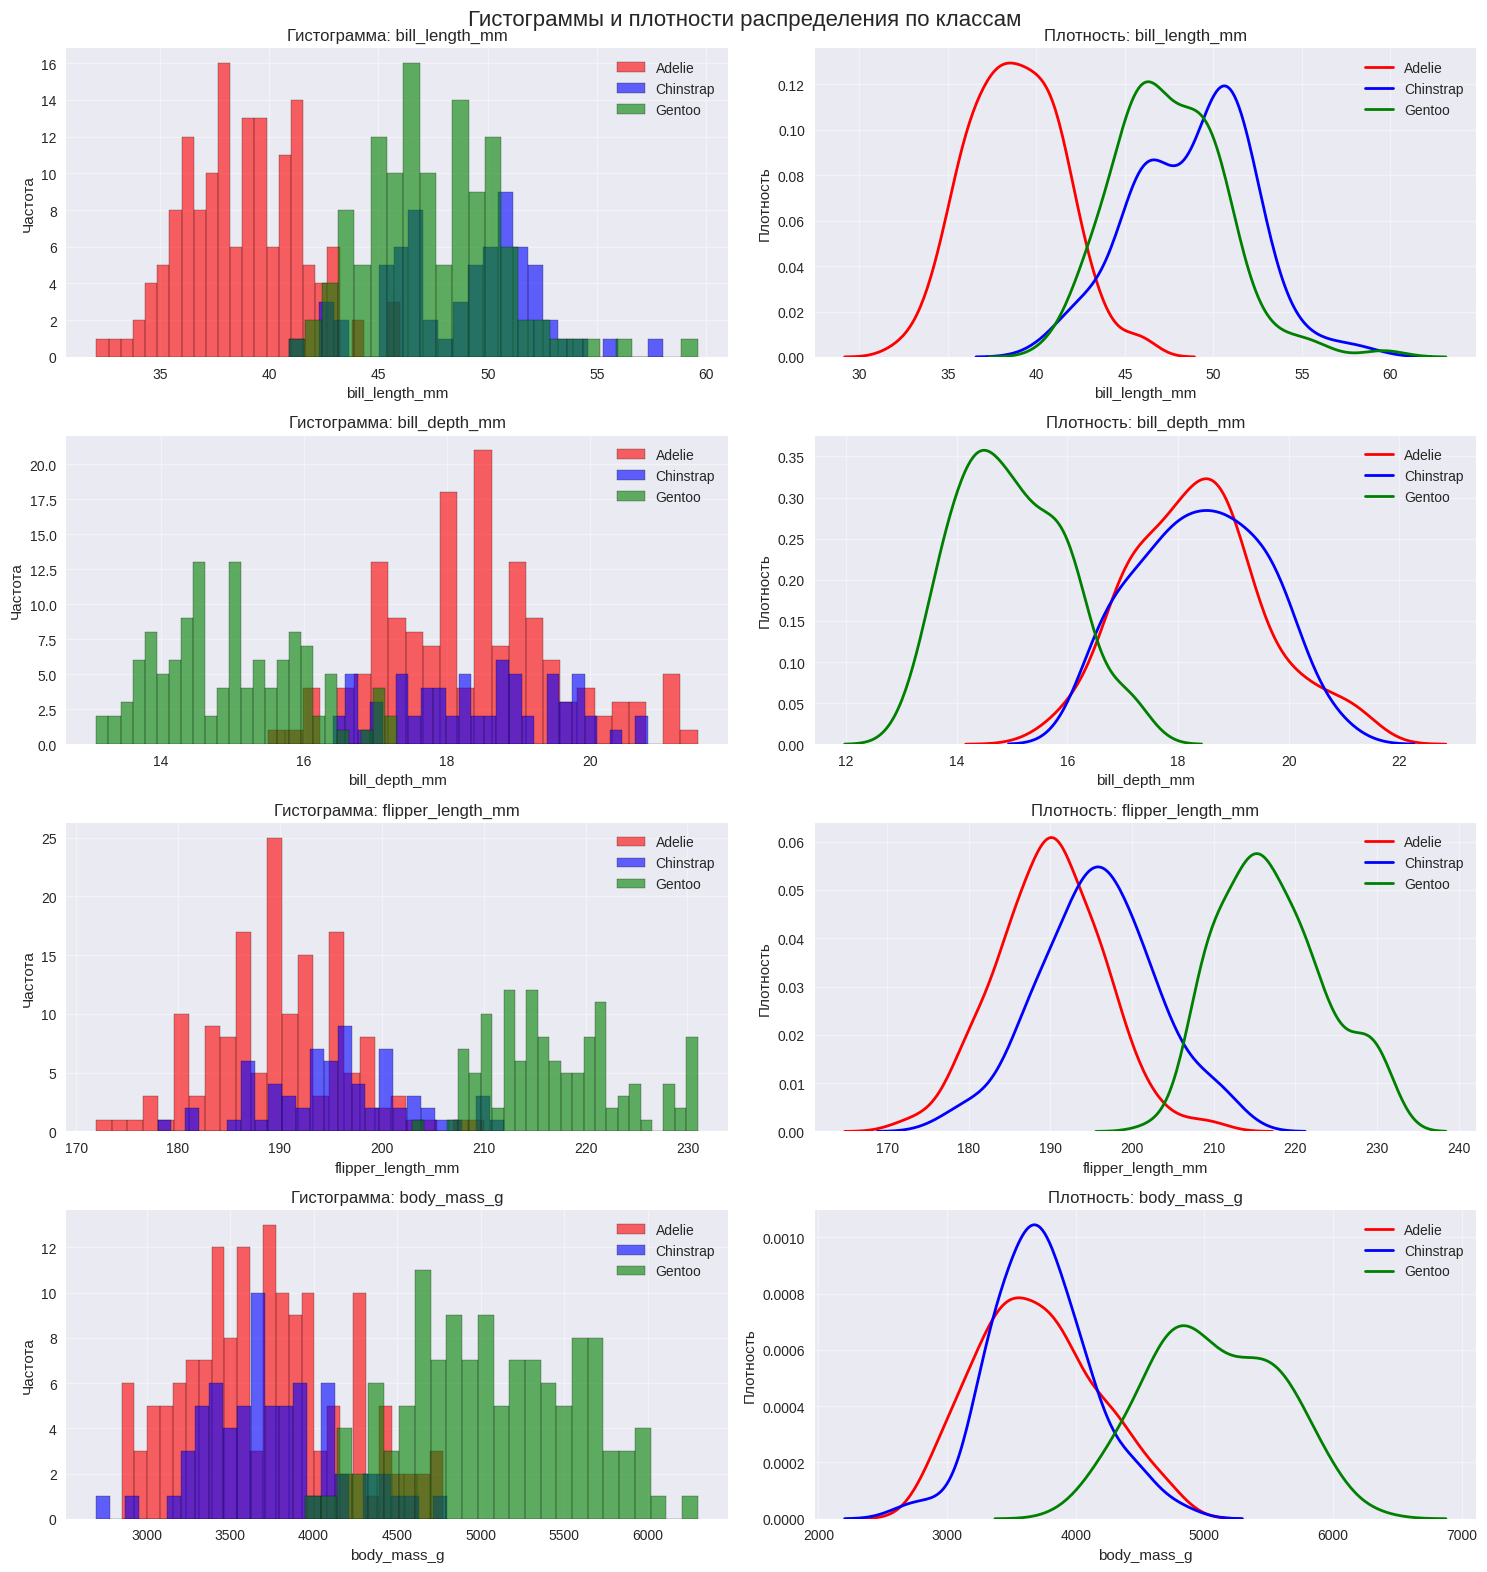

In [7]:
fig, axes = plt.subplots(4, 2, figsize=(15,16))
fig.suptitle('Гистограммы и плотности распределения по классам', fontsize=16)

for idx, feature in enumerate(selected_features):
    ax_hist = axes[idx, 0]
    for species in selected_species:
        species_data = df_filtered[df_filtered['species'] == species][feature]
        ax_hist.hist(species_data, bins=25, alpha=0.6, label=species,
                     color=species_colors[species], edgecolor='black', linewidth=0.3)

    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel('Частота')
    ax_hist.set_title(f'Гистограмма: {feature}')
    ax_hist.legend()
    ax_hist.grid(True, alpha=0.4)

    # Плотности
    ax_kde = axes[idx, 1]
    for species in selected_species:
        species_data = df_filtered[df_filtered['species'] == species][feature]
        sns.kdeplot(data=species_data, ax=ax_kde, label=species, 
                    color=species_colors[species], linewidth=2)
        ax_kde.set_xlabel(feature)
        ax_kde.set_ylabel('Плотность')
        ax_kde.set_title(f'Плотность: {feature}')
        ax_kde.legend()
        ax_kde.grid(True, alpha=0.4)

plt.tight_layout()
plt.show()

# 4 ПУНКТ

In [21]:
def pearsonr_calc(data, features):
    n = len(features)
    corr_matrix = np.zeros((n,n))
    p_matrix = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            if i == j:
                corr_matrix[i, j] = 1.0
                p_matrix[i, j] = 0.0

            else:
                corr_value, p_value = pearsonr(data[features[i]], data[features[j]])
                corr_matrix[i, j] = corr_value
                p_matrix[i, j] = p_value

    corr_df = pd.DataFrame(corr_matrix,
                           index=features,
                           columns=features)
    
    p_df = pd.DataFrame(p_matrix,
                           index=features,
                           columns=features)

    return corr_df, p_df

def spearmanr_calc(data, features):
    n = len(features)
    corr_matrix = np.zeros((n,n))
    p_matrix = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            if i == j:
                corr_matrix[i, j] = 1.0
                p_matrix[i, j] = 0.0

            else:
                corr_value, p_value = spearmanr(data[features[i]], data[features[j]])
                corr_matrix[i, j] = corr_value
                p_matrix[i, j] = p_value

    corr_df = pd.DataFrame(corr_matrix,
                           index=features,
                           columns=features)
    
    p_df = pd.DataFrame(p_matrix,
                           index=features,
                           columns=features)
    
    return corr_df, p_df

def heatmap_plot(corr_df, pval_df, title, annot=True):
    """
    Тепловая карта с выделением статистически значимых корреляций
    """
    plt.figure(figsize=(8, 6))
    
    # Создаем маску для значимых ячеек (p < 0.05)
    mask_significant = pval_df < 0.05
    mask_highly_significant = pval_df < 0.01
    
    # Создаем аннотации со звездочками
    if annot:
        annot_matrix = corr_df.copy().astype(str)
        for i in range(len(corr_df)):
            for j in range(len(corr_df)):
                pval = pval_df.iloc[i, j]
                corr = corr_df.iloc[i, j]
                
                if pval < 0.001:
                    annot_matrix.iloc[i, j] = f"{corr:.3f}***"
                elif pval < 0.01:
                    annot_matrix.iloc[i, j] = f"{corr:.3f}**"
                elif pval < 0.05:
                    annot_matrix.iloc[i, j] = f"{corr:.3f}*"
                else:
                    annot_matrix.iloc[i, j] = f"{corr:.3f}"
    else:
        annot_matrix = True
    
    # Рисуем тепловую карту
    sns.heatmap(corr_df, 
                annot=annot_matrix,
                cmap='coolwarm', 
                center=0,
                vmin=-1, 
                vmax=1,
                square=True,
                fmt='',  # убираем автоматическое форматирование
                cbar_kws={'label': 'Коэффициент корреляции'})
    
    # Добавляем рамки для значимых корреляций
    # Для p < 0.05 - тонкая черная рамка
    for i in range(len(corr_df)):
        for j in range(len(corr_df)):
            if mask_significant.iloc[i, j] and i != j:
                plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, 
                                                fill=False, 
                                                edgecolor='black', 
                                                lw=1))
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

    # Выводим легенду значимости
    print("Уровни значимости:")
    print("*** - p < 0.001")
    print("**  - p < 0.01") 
    print("*   - p < 0.05")
    print()


=== КОРРЕЛЯЦИЯ ПО ВСЕМУ ДАТАСЕТУ ===
Матрица корреляции Пирсона:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  

Матрица p-values Пирсона:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm       0.000000e+00   1.119662e-05       1.743974e-43   
bill_depth_mm        1.119662e-05   0.000000e+00       1.232734e-32   
flipper_length_mm    1.743974e-43   1.232734e-32       0.000000e+00   
body_mass_g          3.808283e-34   2.276941e-20      4.370681e-107   

                     body_mass_

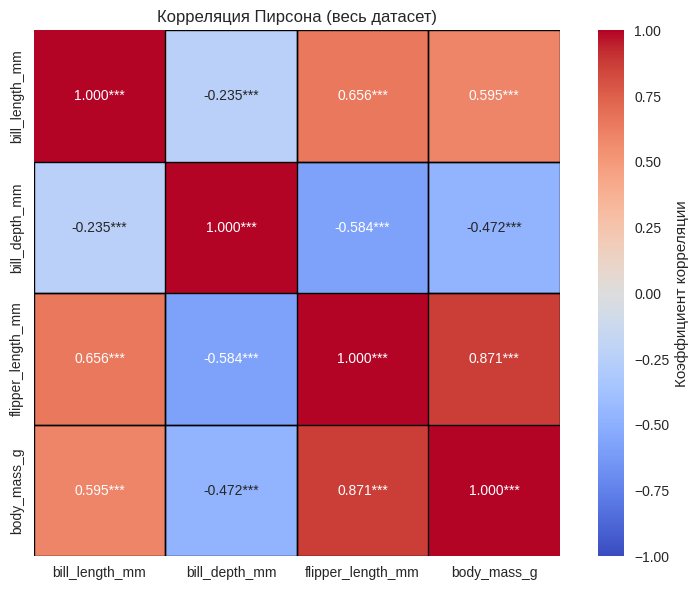

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05



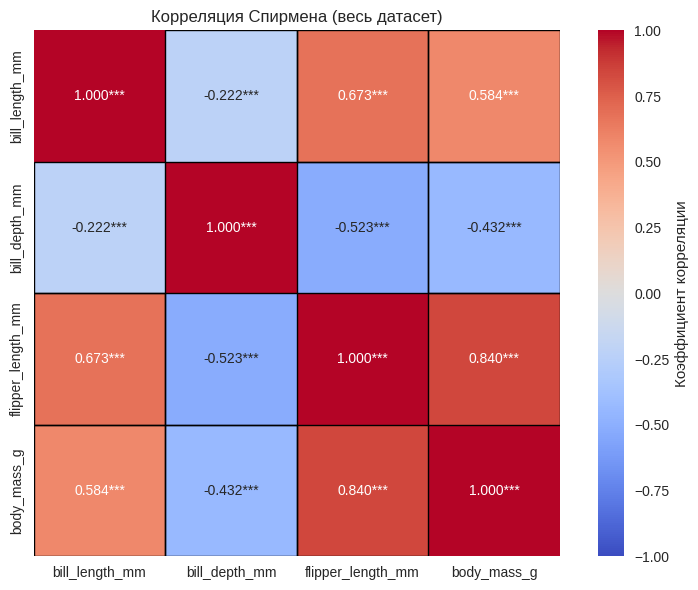

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05



In [22]:
print("=== КОРРЕЛЯЦИЯ ПО ВСЕМУ ДАТАСЕТУ ===")

# Пирсон для всего датасета
pearson_corr, pearson_p = pearsonr_calc(df_filtered, selected_features)
print("Матрица корреляции Пирсона:")
print(pearson_corr)
print("\nМатрица p-values Пирсона:")
print(pearson_p)

# Спирмен для всего датасета
spearman_corr, spearman_p = spearmanr_calc(df_filtered, selected_features)
print("\nМатрица корреляции Спирмена:")
print(spearman_corr)
print("\nМатрица p-values Спирмена:")
print(spearman_p)

# Тепловые карты
heatmap_plot(pearson_corr, pearson_p, "Корреляция Пирсона (весь датасет)")
heatmap_plot(spearman_corr, spearman_p, "Корреляция Спирмена (весь датасет)")

Adelie: 151 записей
Chinstrap: 68 записей
Gentoo: 123 записей
=== КОРРЕЛЯЦИЯ ДЛЯ КАЖДОГО КЛАССА ===

--- Adelie ---


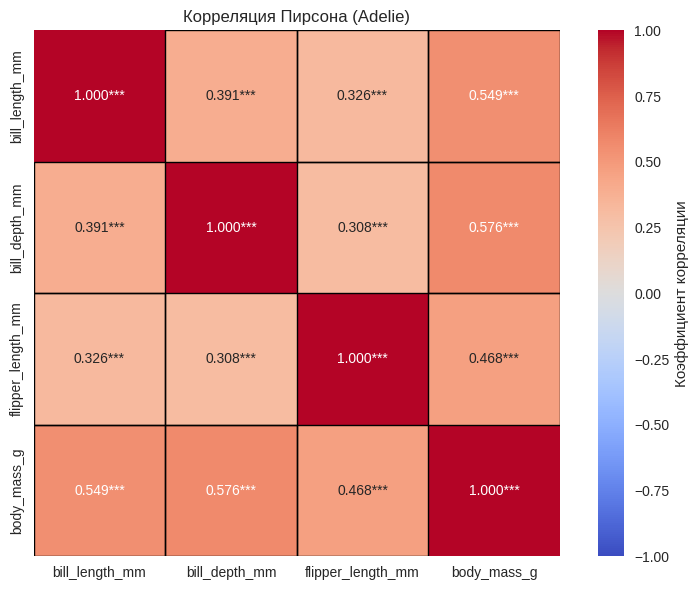

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05



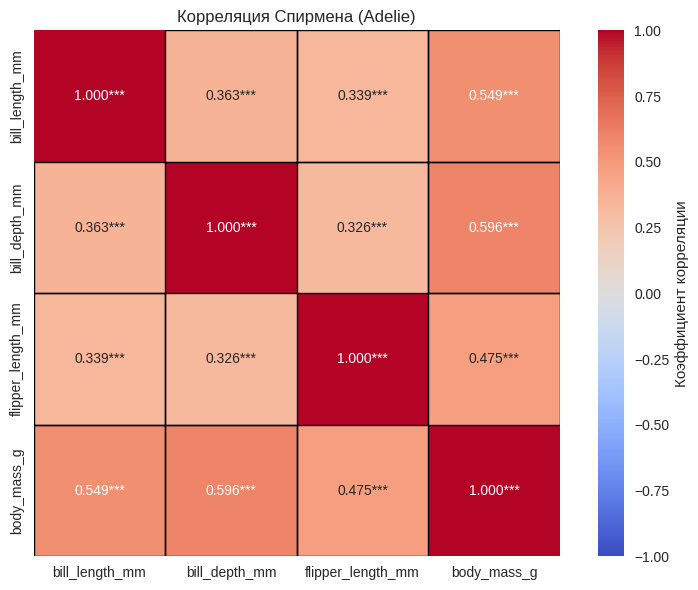

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05


--- Chinstrap ---


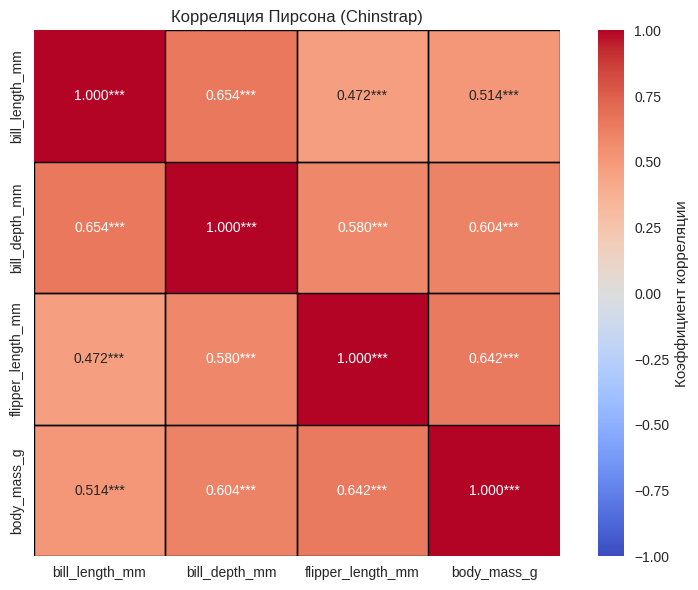

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05



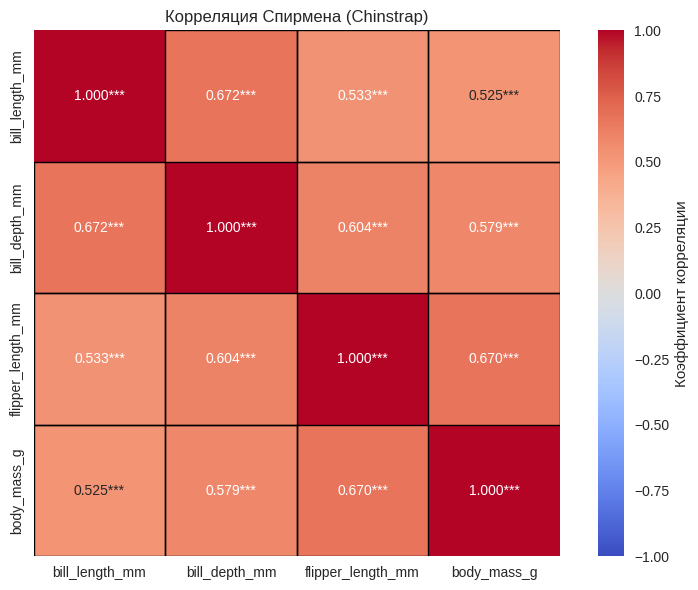

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05


--- Gentoo ---


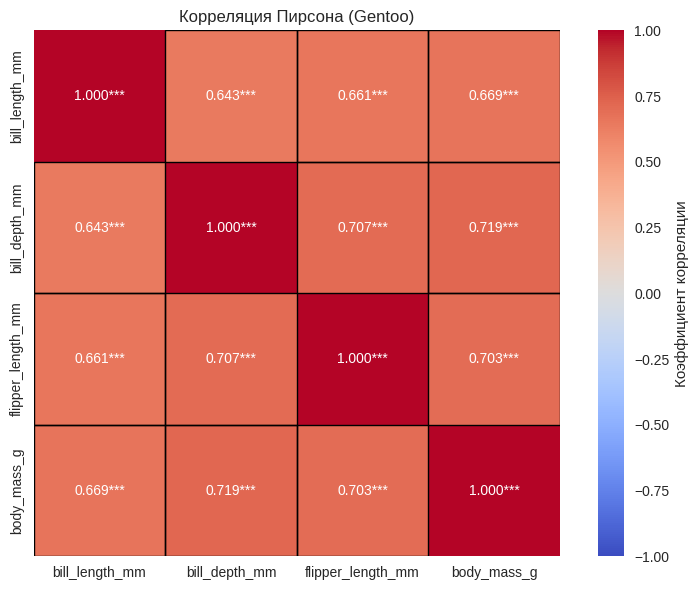

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05



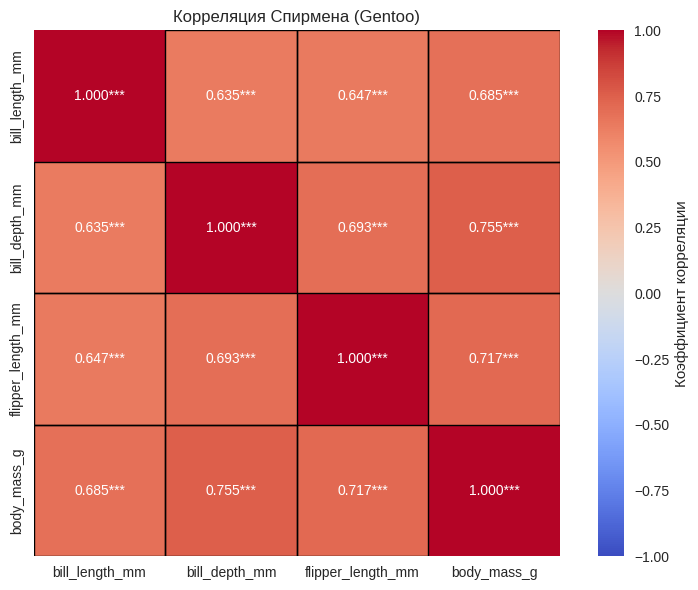

Уровни значимости:
*** - p < 0.001
**  - p < 0.01
*   - p < 0.05



In [23]:
adelie_data = df_filtered[df_filtered['species'] == 'Adelie']
chinstrap_data = df_filtered[df_filtered['species'] == 'Chinstrap']
gentoo_data = df_filtered[df_filtered['species'] == 'Gentoo']

print(f"Adelie: {adelie_data.shape[0]} записей")
print(f"Chinstrap: {chinstrap_data.shape[0]} записей")
print(f"Gentoo: {gentoo_data.shape[0]} записей")

print("=== КОРРЕЛЯЦИЯ ДЛЯ КАЖДОГО КЛАССА ===")

# Для Adelie
print("\n--- Adelie ---")
pearson_adelie, p_adelie = pearsonr_calc(adelie_data, selected_features)
spearman_adelie, sp_adelie = spearmanr_calc(adelie_data, selected_features)

heatmap_plot(pearson_adelie, p_adelie, "Корреляция Пирсона (Adelie)")
heatmap_plot(spearman_adelie, sp_adelie, "Корреляция Спирмена (Adelie)")

# Для Chinstrap
print("\n--- Chinstrap ---")
pearson_chinstrap, p_chinstrap = pearsonr_calc(chinstrap_data, selected_features)
spearman_chinstrap, sp_chinstrap = spearmanr_calc(chinstrap_data, selected_features)

heatmap_plot(pearson_chinstrap, p_chinstrap, "Корреляция Пирсона (Chinstrap)")
heatmap_plot(spearman_chinstrap, sp_chinstrap, "Корреляция Спирмена (Chinstrap)")

# Для Gentoo
print("\n--- Gentoo ---")
pearson_gentoo, p_gentoo = pearsonr_calc(gentoo_data, selected_features)
spearman_gentoo, sp_gentoo = spearmanr_calc(gentoo_data, selected_features)

heatmap_plot(pearson_gentoo, p_gentoo, "Корреляция Пирсона (Gentoo)")
heatmap_plot(spearman_gentoo, sp_gentoo, "Корреляция Спирмена (Gentoo)")

# 5 ПУНКТ

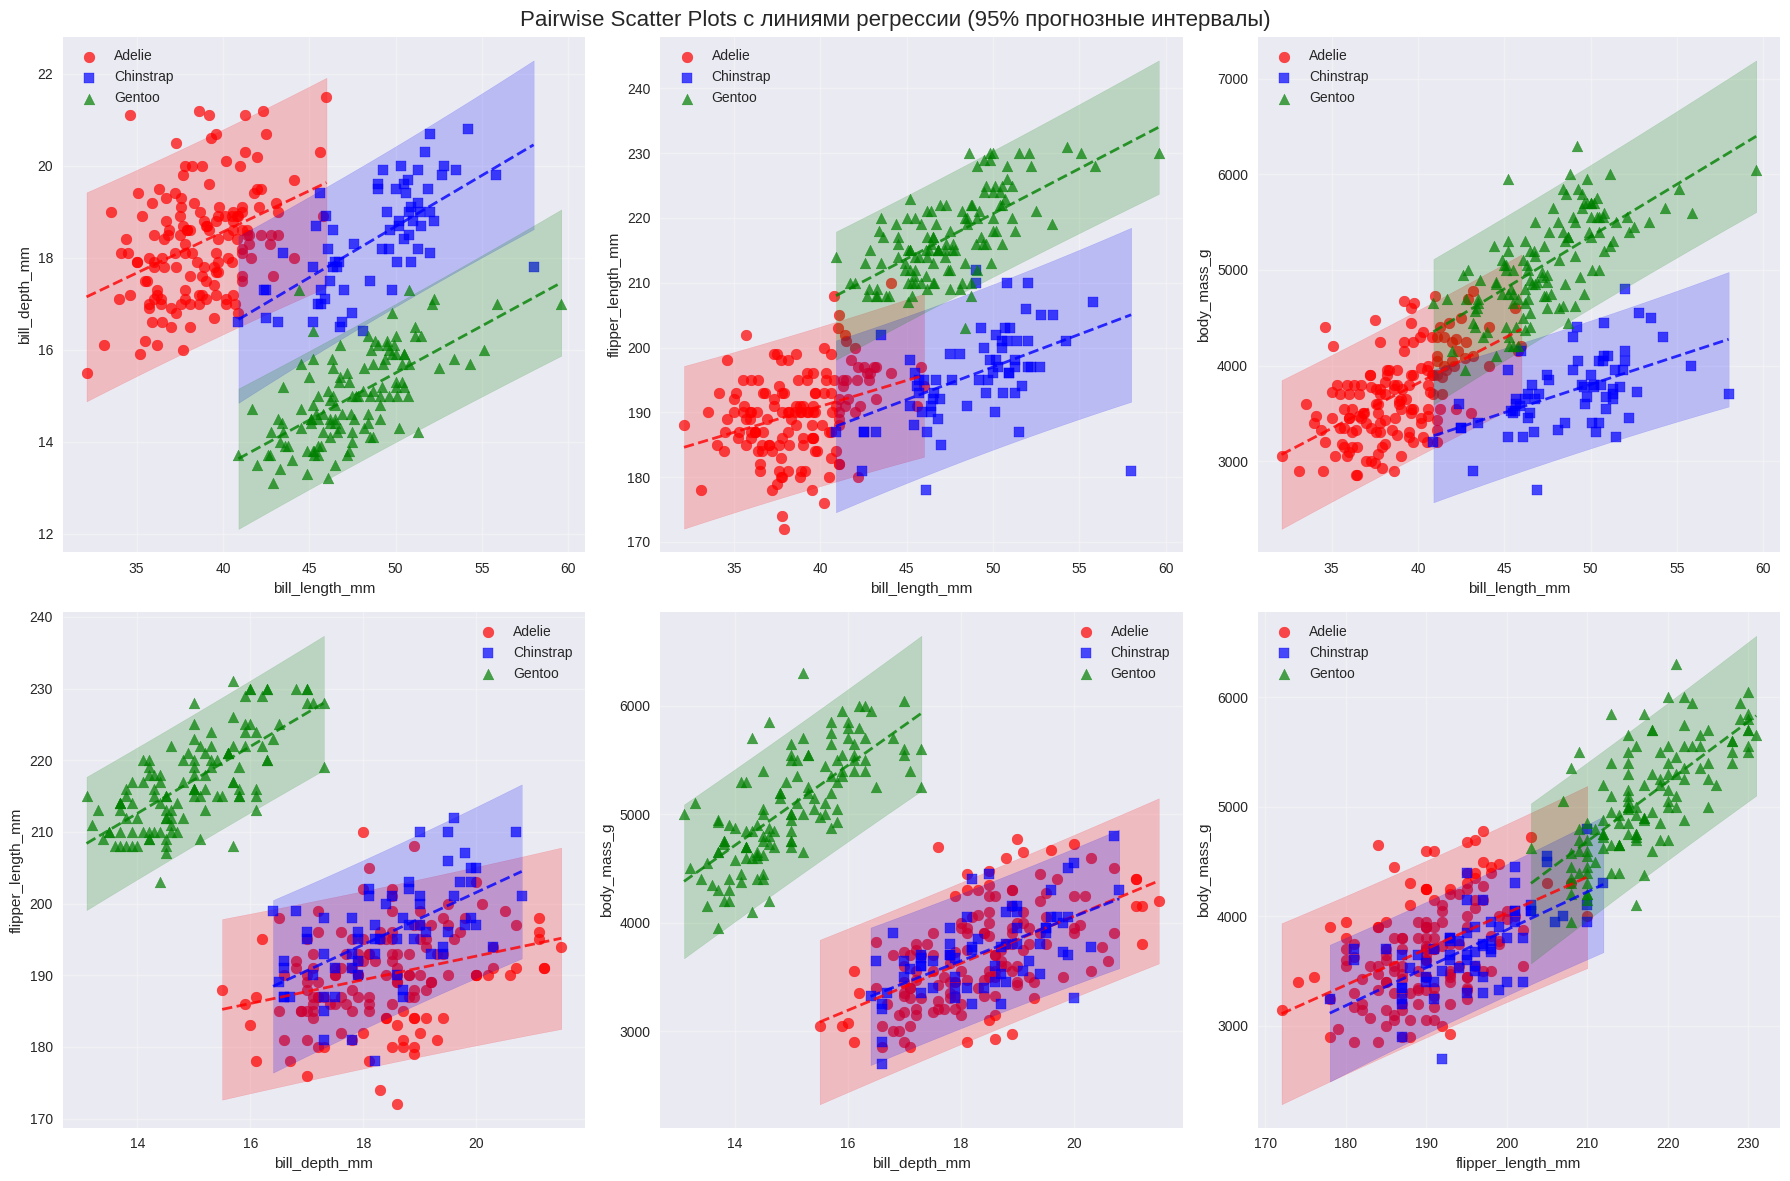

In [28]:
feature_pairs = list(combinations(selected_features, 2))

species_colors = {'Adelie': 'red', 'Chinstrap': 'blue', 'Gentoo': 'green'}
species_markers = {'Adelie': 'o', 'Chinstrap': 's', 'Gentoo': '^'}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Pairwise Scatter Plots с линиями регрессии (95% прогнозные интервалы)', fontsize=16)

axes_flat = axes.flatten()

for idx, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes_flat[idx]
    
    # Рисуем точки для каждого класса
    for species in selected_species:
        species_data = df_filtered[df_filtered['species'] == species]
        x_data = species_data[x_feature].values
        y_data = species_data[y_feature].values
        
        # Рисуем точки
        ax.scatter(x_data, y_data,
                  c=species_colors[species], marker=species_markers[species],
                  label=species, alpha=0.7, s=60)
        
        # Линейная регрессия для этого класса
        if len(x_data) > 1:  # Проверяем, что есть достаточно точек
            # Создаем модель линейной регрессии
            X = x_data.reshape(-1, 1)
            model = LinearRegression()
            model.fit(X, y_data)
            
            # Прогнозы
            x_range = np.linspace(x_data.min(), x_data.max(), 100)
            y_pred = model.predict(x_range.reshape(-1, 1))
            
            # Рисуем линию регрессии
            ax.plot(x_range, y_pred, color=species_colors[species], 
                   linewidth=2, linestyle='--', alpha=0.8)
            
            # Прогнозные интервалы (95%)
            n = len(x_data)
            y_mean = y_pred
            # Стандартная ошибка прогноза
            residuals = y_data - model.predict(X)
            mse = np.sum(residuals**2) / (n - 2)  # MSE
            se_pred = np.sqrt(mse * (1 + 1/n + (x_range - x_data.mean())**2 / np.sum((x_data - x_data.mean())**2)))
            
            # t-значение для 95% доверительного интервала
            t_val = stats.t.ppf(0.975, n - 2)
            
            # Верхняя и нижняя границы интервала
            y_upper = y_pred + t_val * se_pred
            y_lower = y_pred - t_val * se_pred
            
            # Рисуем прогнозные интервалы
            ax.fill_between(x_range, y_lower, y_upper, 
                           color=species_colors[species], alpha=0.2)
    
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

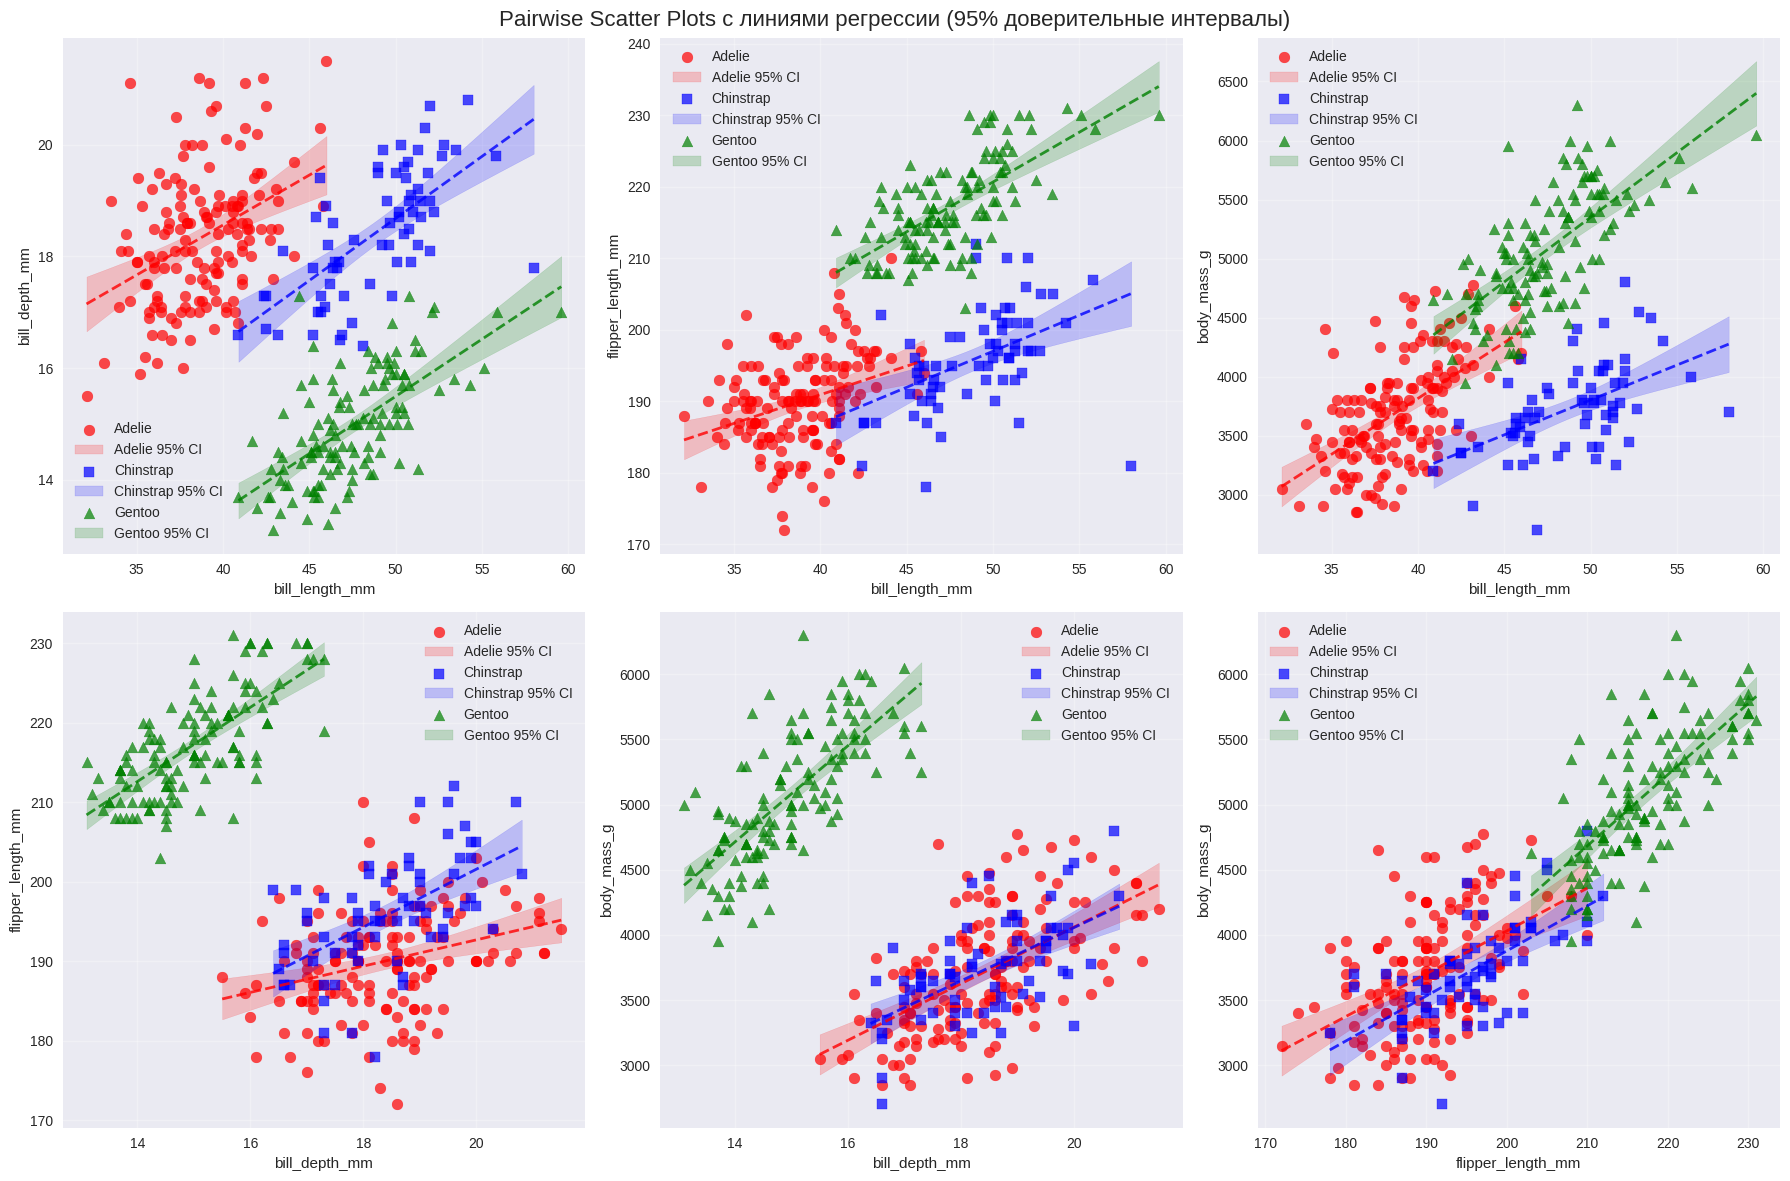

In [29]:
feature_pairs = list(combinations(selected_features, 2))

species_colors = {'Adelie': 'red', 'Chinstrap': 'blue', 'Gentoo': 'green'}
species_markers = {'Adelie': 'o', 'Chinstrap': 's', 'Gentoo': '^'}

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Pairwise Scatter Plots с линиями регрессии (95% доверительные интервалы)', fontsize=16)

axes_flat = axes.flatten()

for idx, (x_feature, y_feature) in enumerate(feature_pairs):
    ax = axes_flat[idx]
    
    # Рисуем точки для каждого класса
    for species in selected_species:
        species_data = df_filtered[df_filtered['species'] == species]
        x_data = species_data[x_feature].values
        y_data = species_data[y_feature].values
        
        # Рисуем точки
        ax.scatter(x_data, y_data,
                  c=species_colors[species], marker=species_markers[species],
                  label=species, alpha=0.7, s=60)
        
        # Линейная регрессия для этого класса
        if len(x_data) > 1:  # Проверяем, что есть достаточно точек
            # Создаем модель линейной регрессии
            X = x_data.reshape(-1, 1)
            model = LinearRegression()
            model.fit(X, y_data)
            
            # Прогнозы
            x_range = np.linspace(x_data.min(), x_data.max(), 100)
            y_pred = model.predict(x_range.reshape(-1, 1))
            
            # Рисуем линию регрессии
            ax.plot(x_range, y_pred, color=species_colors[species], 
                   linewidth=2, linestyle='--', alpha=0.8)
            
            # ДОВЕРИТЕЛЬНЫЕ ИНТЕРВАЛЫ (95%) - ИЗМЕНЕНИЕ ЗДЕСЬ!
            n = len(x_data)
            # Стандартная ошибка среднего (confidence interval)
            residuals = y_data - model.predict(X)
            mse = np.sum(residuals**2) / (n - 2)  # MSE
            # Формула для доверительного интервала (без +1)
            se_mean = np.sqrt(mse * (1/n + (x_range - x_data.mean())**2 / np.sum((x_data - x_data.mean())**2)))
            
            # t-значение для 95% доверительного интервала
            t_val = stats.t.ppf(0.975, n - 2)
            
            # Верхняя и нижняя границы ДОВЕРИТЕЛЬНОГО интервала
            y_upper = y_pred + t_val * se_mean
            y_lower = y_pred - t_val * se_mean
            
            # Рисуем доверительные интервалы
            ax.fill_between(x_range, y_lower, y_upper, 
                           color=species_colors[species], alpha=0.2,
                           label=f'{species} 95% CI')
    
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
from scipy.stats import f, chi2
import numpy as np

def print_regression_stats_sklearn(x_data, y_data, x_feature, y_feature, species):
    """
    Альтернативная реализация с scikit-learn
    """
    if len(x_data) < 2:
        print(f"Недостаточно данных для {species}")
        return
    
    X = x_data.reshape(-1, 1)
    
    # Модель LinearRegression
    model = LinearRegression()
    model.fit(X, y_data)
    
    # Прогнозы и остатки
    y_pred = model.predict(X)
    residuals = y_data - y_pred
    n = len(x_data)
    
    # Основные статистики
    ssr = np.sum((y_pred - np.mean(y_data))**2)  # Regression sum of squares
    sse = np.sum(residuals**2)  # Error sum of squares
    sst = ssr + sse  # Total sum of squares
    
    # 1. Формула регрессии
    print(f"\n=== Регрессия для {species}: {y_feature} ~ {x_feature} ===")
    print(f"1. Формула регрессии: y = {model.coef_[0]:.4f}*x + {model.intercept_:.4f}")
    
    # 2. R²
    r_squared = 1 - (sse / sst)
    print(f"2. R² = {r_squared:.4f}")
    
    # 3. F-критерий
    df_model = 1
    df_resid = n - 2
    f_value = (ssr / df_model) / (sse / df_resid)
    f_pvalue = 1 - f.cdf(f_value, df_model, df_resid)
    print(f"3. F-критерий: F({df_model}, {df_resid}) = {f_value:.4f}, p = {f_pvalue:.4f}")
    
    # 4. LR test (упрощенный)
    # Для линейной регрессии LR ≈ F test
    lr_stat = n * np.log(sst / sse)
    lr_pvalue = 1 - chi2.cdf(lr_stat, df_model)
    print(f"4. LR test: χ²({df_model}) = {lr_stat:.4f}, p = {lr_pvalue:.4f}")
    
    # 5. Score test (упрощенный)
    score_stat = (n * r_squared) / (1 - r_squared)
    score_pvalue = 1 - chi2.cdf(score_stat, df_model)
    print(f"5. Score test: χ²({df_model}) = {score_stat:.4f}, p = {score_pvalue:.4f}")

# Применяем
print("=== СТАТИСТИКА ЛИНЕЙНЫХ РЕГРЕССИЙ (scikit-learn) ===")

for x_feature, y_feature in feature_pairs:
    print(f"\n{'='*60}")
    print(f"ПАРА ПРИЗНАКОВ: {x_feature} vs {y_feature}")
    print(f"{'='*60}")
    
    for species in selected_species:
        species_data = df_filtered[df_filtered['species'] == species]
        x_data = species_data[x_feature].values
        y_data = species_data[y_feature].values
        
        if len(x_data) > 1:
            print_regression_stats_sklearn(x_data, y_data, x_feature, y_feature, species)

=== СТАТИСТИКА ЛИНЕЙНЫХ РЕГРЕССИЙ (scikit-learn) ===

ПАРА ПРИЗНАКОВ: bill_length_mm vs bill_depth_mm

=== Регрессия для Adelie: bill_depth_mm ~ bill_length_mm ===
1. Формула регрессии: y = 0.1788*x + 11.4091
2. R² = 0.1533
3. F-критерий: F(1, 149) = 26.9702, p = 0.0000
4. LR test: χ²(1) = 25.1216, p = 0.0000
5. Score test: χ²(1) = 27.3322, p = 0.0000

=== Регрессия для Chinstrap: bill_depth_mm ~ bill_length_mm ===
1. Формула регрессии: y = 0.2222*x + 7.5691
2. R² = 0.4271
3. F-критерий: F(1, 66) = 49.2053, p = 0.0000
4. LR test: χ²(1) = 37.8801, p = 0.0000
5. Score test: χ²(1) = 50.6963, p = 0.0000

=== Регрессия для Gentoo: bill_depth_mm ~ bill_length_mm ===
1. Формула регрессии: y = 0.2048*x + 5.2510
2. R² = 0.4139
3. F-критерий: F(1, 121) = 85.4645, p = 0.0000
4. LR test: χ²(1) = 65.7236, p = 0.0000
5. Score test: χ²(1) = 86.8772, p = 0.0000

ПАРА ПРИЗНАКОВ: bill_length_mm vs flipper_length_mm

=== Регрессия для Adelie: flipper_length_mm ~ bill_length_mm ===
1. Формула регрессии: y